In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for plotting pairwise relationships in a dataset.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #for train test splitting
from sklearn.tree import DecisionTreeClassifier #for decision tree object
from sklearn.metrics import classification_report, confusion_matrix #for checking testing results
from sklearn.tree import plot_tree #for visualizing tree

In [2]:
df = pd.read_csv("C:\\Users\\Gauri Mohite\\Documents\\Excel files(program)\DecisionTree.csv")
df.head()

,color,height,type,class
0,Grey,10,herbivores,elephant
1,Yellow,10,herbivores,giraffe
2,Brown,3,herbivores,monkey
3,Grey,10,herbivores,elephant
4,Yellow,4,carnivores,tiger


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   22 non-null     object
 1   height  22 non-null     int64 
 2   type    22 non-null     object
 3   class   22 non-null     object
dtypes: int64(1), object(3)
memory usage: 832.0+ bytes


In [4]:
df.shape

(22, 4)

In [5]:
df.isnull().any()

color     False
height    False
type      False
class     False
dtype: bool

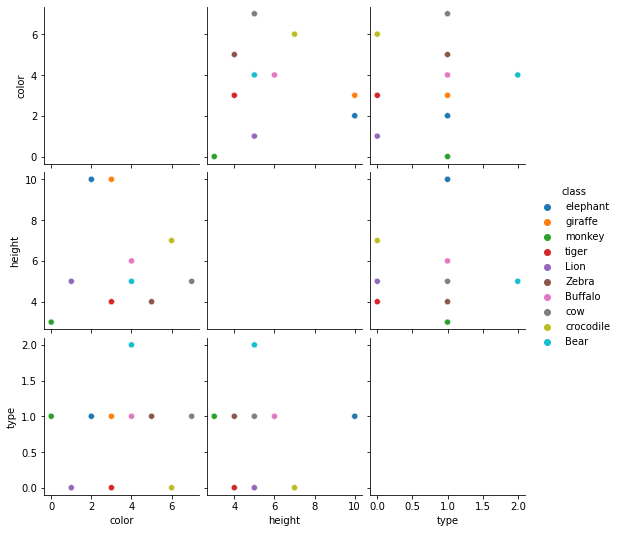

In [6]:
# to visualise the attribute all at once
le = LabelEncoder()
df1 = df.copy()
df1.color = le.fit_transform(df1.color)
df1.type = le.fit_transform(df1.type)
sns.pairplot(data=df1, hue='class')

<AxesSubplot:>

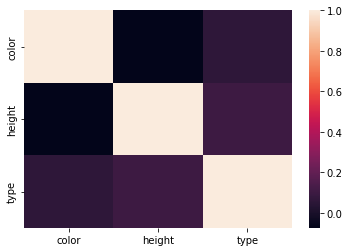

In [7]:
sns.heatmap(df1.corr())

In [8]:
target = df1['class']
df2 = df1.copy()
df2 = df2.drop('class', axis=1)
target

0      elephant
1       giraffe
2        monkey
3      elephant
4         tiger
5          Lion
6         Zebra
7       Buffalo
8           cow
9     crocodile
10         Bear
11     elephant
12      giraffe
13       monkey
14     elephant
15        tiger
16         Lion
17        Zebra
18      Buffalo
19          cow
20    crocodile
21         Bear
Name: class, dtype: object

In [9]:
X = df2
# label encoding
le = LabelEncoder()
target = le.fit_transform(target)
y = target
target

array([6, 7, 8, 6, 9, 2, 3, 1, 4, 5, 0, 6, 7, 8, 6, 9, 2, 3, 1, 4, 5, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print("Training split input- ",X_train.shape)
print("Testing split input- ",X_test.shape)

Training split input-  (17, 3)
Testing split input-  (5, 3)


In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report-\n", classification_report(y_test,y_pred))

Classification report-
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Text(0.5, 1.0, 'Accuracy Score: 1.0')

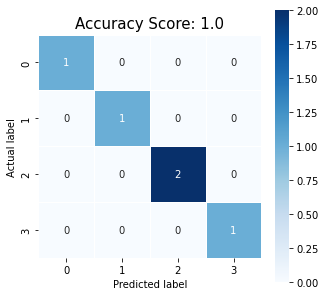

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square= True, cmap='Blues')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size=15)

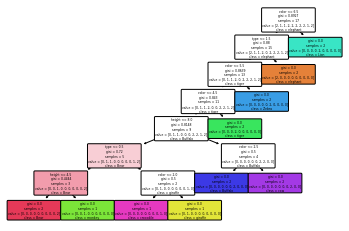

In [13]:
# visualising the graph without the use of graphvizplt

cn = ['elephant','giraffe','monkey','tiger','Lion',
      'Zebra','Buffalo','cow','crocodile','Bear']
dec_tree = plot_tree(decision_tree=dtree, feature_names= df2.columns,
                     class_names=cn, filled=True, precision=4, rounded=True)